<a href="https://colab.research.google.com/github/ArindamBanerji/feature-eng-eda-recipes/blob/main/tf_keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.5765908 ,  0.07173322,  0.47202098,  0.3578482 , -0.19218856,
        -0.10109271, -0.36431685, -0.00284524,  0.63426816, -0.24609098]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.05222267, 0.09986714, 0.14902712, 0.13294767, 0.07670131,
        0.08401662, 0.06457262, 0.09269014, 0.1752784 , 0.07267638]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.4767406

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [ ]:
# Create a copy of the test model (with freshly initialized weights).
model_rms = tf.keras.models.clone_model(model)

In [ ]:
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model_rms.compile(optimizer=opt_rmsprop,
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.044

In [ ]:
model_rms.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1569 - accuracy: 0.9549
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1267 - accuracy: 0.9638
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1120 - accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1020 - accuracy: 0.9715
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0937 - accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0902 - accuracy: 0.9758
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.9773
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0823 - accuracy: 0.9787
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.077

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0685 - accuracy: 0.9808 - 579ms/epoch - 2ms/step


[0.06845351308584213, 0.9807999730110168]

In [ ]:
model_rms.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0992 - accuracy: 0.9787 - 537ms/epoch - 2ms/step


[0.09916026890277863, 0.9786999821662903]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[8.9814108e-11, 2.4002667e-09, 6.6739823e-08, 1.0193753e-05,
        1.3032484e-13, 1.5458768e-08, 1.0677528e-15, 9.9998927e-01,
        9.3988843e-09, 3.9451353e-07],
       [2.5019946e-09, 4.6544528e-07, 9.9999952e-01, 5.4763154e-09,
        4.2142986e-16, 2.8426157e-08, 1.5785916e-11, 1.9804166e-15,
        3.1913434e-11, 1.2913376e-17],
       [6.9327755e-10, 9.9956077e-01, 9.3998053e-05, 1.3919874e-06,
        4.7353865e-06, 2.6432954e-07, 3.8455906e-07, 2.3245403e-04,
        1.0596158e-04, 7.1833237e-09],
       [9.9995434e-01, 1.8423103e-09, 8.9386776e-06, 2.4836515e-06,
        5.9289151e-10, 1.3195148e-05, 2.6998131e-07, 1.9170506e-05,
        6.8948645e-11, 1.6459452e-06],
       [3.4736491e-08, 1.0818520e-13, 1.5162867e-06, 8.8003121e-10,
        9.9102545e-01, 1.0157770e-09, 5.6286026e-10, 8.8541237e-06,
        2.9666833e-07, 8.9639416e-03]], dtype=float32)>

## Image classification example

In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data first 

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Preprocess the data 

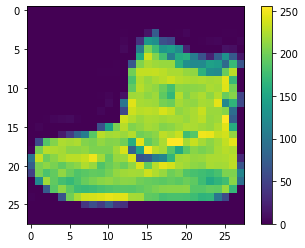

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

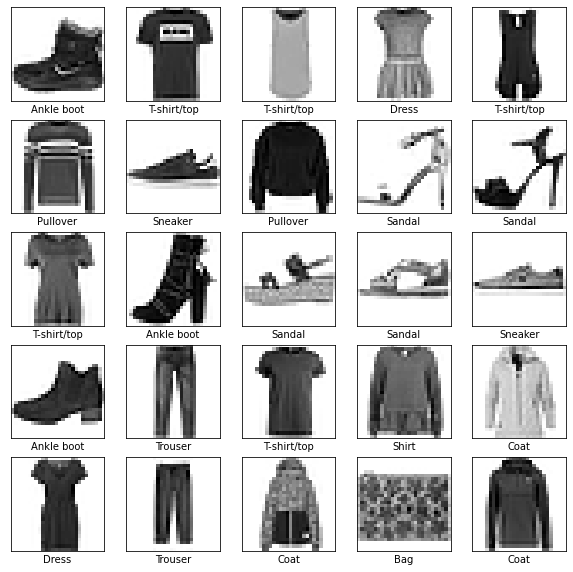

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
# Create a copy of the test model (with freshly initialized weights).
model_rms = tf.keras.models.clone_model(model)

In [34]:
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model_rms.compile(optimizer=opt_rmsprop,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4647 - accuracy: 0.8341
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8690
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3303 - accuracy: 0.8798
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3098 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2609 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2529 - accuracy: 0.9059
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.243

In [37]:
model_rms.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9392 - accuracy: 0.7323
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5311 - accuracy: 0.8268
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4721 - accuracy: 0.8457
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4433 - accuracy: 0.8545
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4244 - accuracy: 0.8604
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8643
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4058 - accuracy: 0.8682
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4060 - accuracy: 0.8693
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3966 - accuracy: 0.8717
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.394

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy with adam :', test_acc)

313/313 - 1s - loss: 0.3319 - accuracy: 0.8866 - 571ms/epoch - 2ms/step

Test accuracy: 0.8866000175476074


In [39]:
test_loss, test_acc = model_rms.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy with rmsprop:', test_acc)

313/313 - 1s - loss: 0.4544 - accuracy: 0.8641 - 574ms/epoch - 2ms/step

Test accuracy with rmsprop: 0.8640999794006348


In [40]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [41]:
probability_model_rms = tf.keras.Sequential([model_rms, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [43]:
predictions_rms = probability_model_rms.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
predictions[0]

array([3.7997128e-07, 1.4261730e-09, 1.9295225e-10, 2.3522351e-10,
       2.5557145e-10, 8.6589309e-04, 1.6467239e-07, 7.4078240e-03,
       2.5919402e-09, 9.9172562e-01], dtype=float32)

In [45]:
predictions_rms[0]

array([4.9598011e-14, 4.7651493e-17, 5.5947093e-16, 7.0696575e-14,
       4.2516582e-14, 1.6678560e-03, 3.7410416e-14, 2.1537561e-03,
       4.2283954e-12, 9.9617839e-01], dtype=float32)

In [46]:
np.argmax(predictions[0])

9

In [47]:
np.argmax(predictions_rms[0])

9

In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

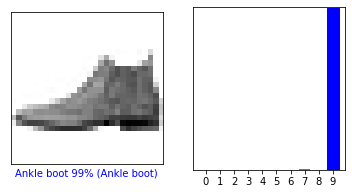

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

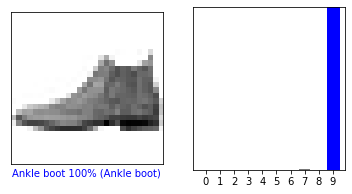

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_rms[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_rms[i],  test_labels)
plt.show()

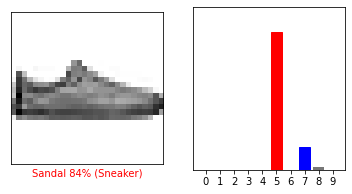

In [51]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

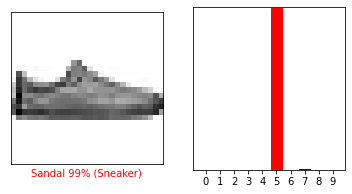

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_rms[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_rms[i],  test_labels)
plt.show()

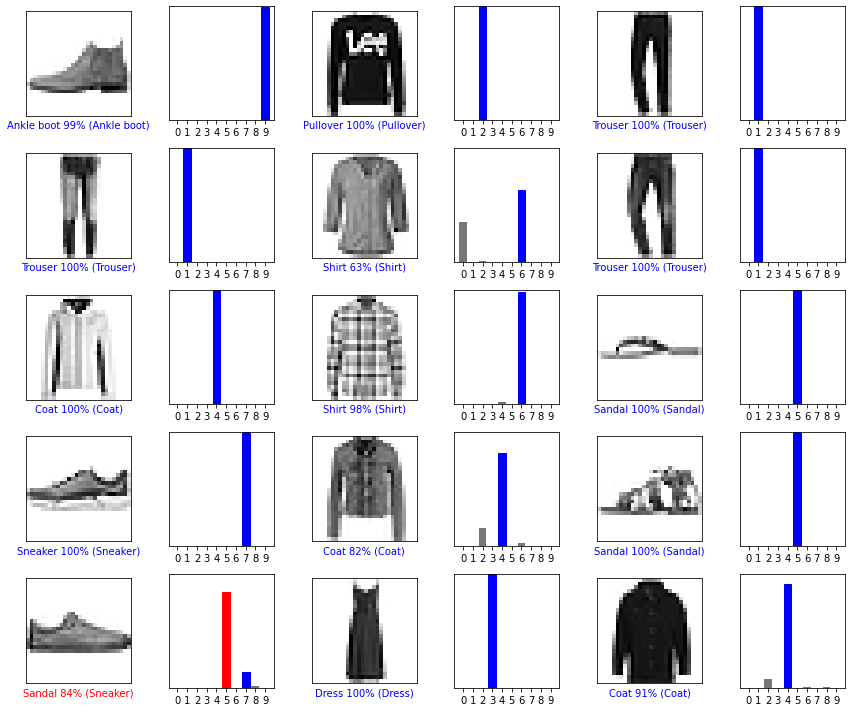

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

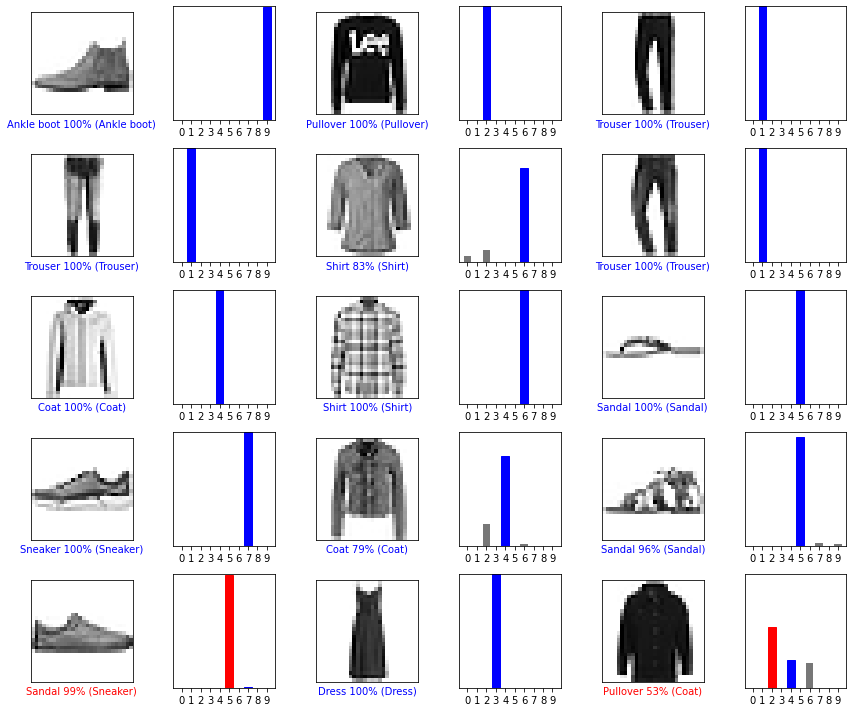

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_rms[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_rms[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[2.6302954e-05 4.6140836e-13 9.9919778e-01 5.5312484e-11 7.2475063e-04
  3.1795167e-11 5.1164432e-05 7.5629149e-15 1.0394445e-09 3.6242377e-11]]


In [60]:
predictions_single_rms = probability_model_rms.predict(img)

print(predictions_single_rms)

1/1 [==============================] - 0s 18ms/step
[[1.5739519e-10 6.1255453e-23 9.9997568e-01 2.8334855e-20 6.3949351e-06
  3.6578021e-22 1.7935312e-05 2.5830644e-31 1.3755691e-18 9.2084137e-31]]


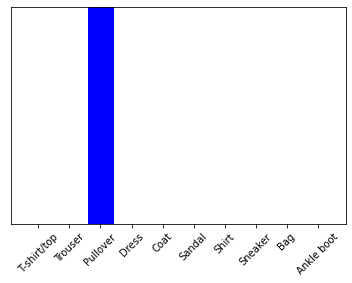

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

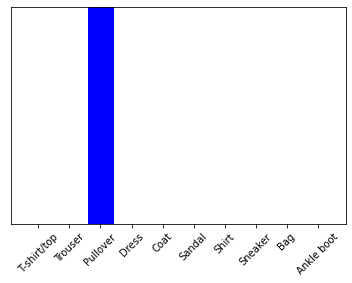

In [61]:
plot_value_array(1, predictions_single_rms[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
np.argmax(predictions_single[0])

2

In [62]:
np.argmax(predictions_single_rms[0])

2